<a href="https://colab.research.google.com/github/Piyumi22/XAI/blob/main/SHAP_example_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://viso.ai/deep-learning/explainable-ai/
2024 oct

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html


In [20]:
!pip install pdpbox


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.9 MB/s eta 0:00:00


In [39]:
!pip show pdpbox


Name: PDPbox
Version: 0.3.0
Summary: Python partial dependence plot toolbox
Home-page: https://github.com/SauceCat/PDPbox
Author: sosuneko
Author-email: jiangchun.lee@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, matplotlib, numpy, numpydoc, pandas, plotly, pqdm, psutil, pytest, scikit-learn, setuptools, sphinx, sphinx-rtd-theme, tqdm, xgboost
Required-by: 


In [41]:
!pip uninstall -y pdpbox
!pip install pdpbox==0.2.1


  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [21]:
# Import necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

##upload data

In [22]:
# from google.colab import drive
# drive.mount('/content/drive')

In [23]:
# Step 1: Load the dataset from GitHub
github_url = "https://raw.githubusercontent.com/Piyumi22/XAI/main/diabetes.csv"
df = pd.read_csv(github_url)

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



When you set the random_state value, you are telling the program to use the same sequence of random numbers every time it runs. This makes the results consistent and reproducible.

In [24]:
df = df.dropna()  # Drop missing values

##pandas profiling

In [25]:
# !pip install pandas_profiling

In [26]:
# from pandas_profiling import ProfileReport
# # Generate the profiling report
# profile = ProfileReport(df, title="Diabetes Dataset Report", explorative=True)

# # Display the report in the notebook
# profile.to_notebook_iframe()

##XGBoost
Key Features of XGBoost Classifier:
Gradient Boosting Algorithm:





* Combines the predictions of multiple weak learners (usually decision trees) to create a strong learner.
Boosting is an iterative process where each new tree corrects the errors of the previous trees.
Optimized for Speed and Performance:

* Highly efficient implementation of gradient boosting.
Optimized for both computational efficiency and model accuracy.
Support for Regularization:

* Includes L1 and L2 regularization to prevent overfitting.
Handles Missing Data:

* Automatically learns the best way to handle missing values during training.
Parallel and Distributed Computing:

* Supports multi-threading and distributed computing for large-scale datasets.
Tree Pruning:

* Uses a "maximum delta step" approach to prune trees, making it robust and accurate.
Custom Loss Functions:

* Allows for custom loss functions in addition to common ones like logistic loss (for binary classification).
Supports Feature Importance Visualization:

Provides built-in tools to interpret feature importance.


###Key Parameters of XGBClassifier:
- n_estimators: Number of trees (default: 100).
- learning_rate: Step size for updating weights (default: 0.3).
- max_depth: Maximum depth of a tree (default: 6).
- objective: Learning task (e.g., binary:logistic for binary classification).
- random_state: Seed for reproducibility.


In [27]:
# Step 2: Define features (X) and target (y)
# X contains all columns except the last one (features).
# y contains only the last column, which is the target variable ('Outcome').
X = df.iloc[:, :-1]  # Select all rows and all columns except the last
y = df.iloc[:, -1]   # Select all rows and only the last column

# Step 3: Split the dataset into training and testing sets
# Using 75% of the data for training and 25% for testing.
# Setting a fixed random_state ensures reproducibility of the split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Step 4: Initialize the XGBoost classifier
# The `random_state` parameter ensures that the model's behavior is deterministic and reproducible.
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)

# Step 5: Train the XGBoost classifier on the training set
# The `.fit()` method trains the model using the training features (X_train) and the target (y_train).
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing set
# The `.score()` method computes the accuracy of the model on the testing set (X_test and y_test).
# Accuracy is the proportion of correctly classified samples.
score = model.score(X_test, y_test)

# Print the accuracy score
print(f"Model Accuracy: {score:.2f}")  # Display the model's performance as a percentage


Model Accuracy: 0.79


#SHAP


SHAP (SHapley Additive exPlanations) provides several visualization tools to interpret machine learning models. Here are some commonly used SHAP plots, along with explanations and example code:


##3. Bar Plot
The bar plot shows the average absolute SHAP values for each feature, highlighting global feature importance.

python

Bar Plot
shap.summary_plot(shap_values, X, plot_type='bar')
Interpretation:
It provides a simpler alternative to the summary plot.
Focuses on the magnitude of the SHAP values (ignoring direction).
##4. Force Plot
The force plot explains how each feature contributes to a single prediction. If interactive plots don't work in Colab, use SHAP’s HTML export feature.

python

 Force Plot for a Single Prediction
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])
If not rendering:
python

shap.save_html("force_plot.html", shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :]))
Download and open the force_plot.html to view it.

##5. Waterfall Plot
The waterfall plot shows a breakdown of how each feature contributes to a single prediction.

python

Waterfall Plot
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X.iloc[0]))
Interpretation:
It visualizes the additive nature of SHAP values.
The base value adjusts step-by-step based on feature contributions to reach the final prediction.
##6. Decision Plot
The decision plot shows how a model makes predictions by combining SHAP values across features. This plot is useful for understanding complex tree-based models.

python

Decision Plot
shappretation:
The x-axis represents the model output.
Each feature contributes to moving the prediction from the base value to the final value.
##7. Heatmap
The heatmap shows interactions between features and their combined impact on predictions.

python

Heatmap
shap.heatmap(shap_values, X)
Interpretation:
Helps identify strong feature interactions.
Color intensity represents the magnitude of the SHAP value..decision_plot(explainer.expected_value, shap_values, X)
Inter

In [28]:
# Import the SHAP library
import shap  # SHAP (SHapley Additive exPlanations) is used for model interpretability

# Step 1: Initialize the SHAP TreeExplainer
# TreeExplainer is specifically designed for tree-based models like XGBoost, LightGBM, or Random Forest.
# It takes the trained model as input to compute SHAP values.
explainer = shap.TreeExplainer(model)

# Step 2: Compute SHAP values for the input data
# SHAP values explain the contribution of each feature to the model's predictions.
# Here, `X` is the input dataset (can be training or test data).
shap_values = explainer.shap_values(X)




##1. Summary Plot
The summary plot provides a global overview of feature importance and how they impact the model's predictions. It shows both the magnitude and direction of the SHAP values for all features across the dataset.


Interpretation:
The features are ranked by importance (top is most important).
The colors represent the feature value (red = high, blue = low).
The horizontal spread shows the range of SHAP values for each feature.


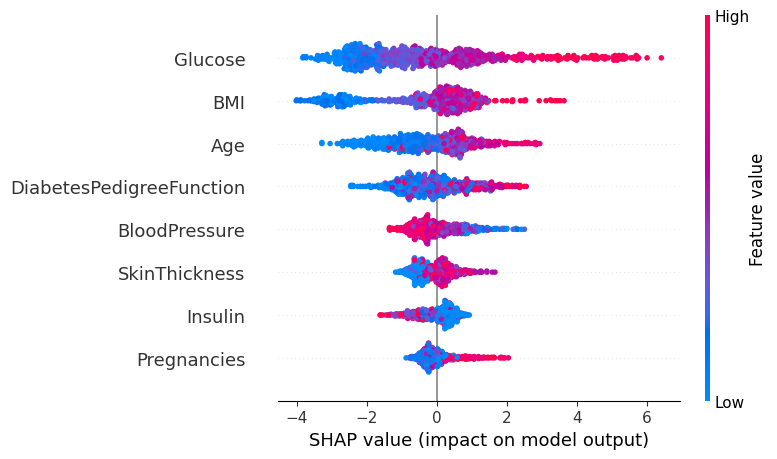

In [29]:
# Summary Plot
shap.summary_plot(shap_values, X, feature_names=X.columns)

##2. Dependence Plot
The dependence plot shows how a specific feature impacts the prediction, considering interactions with another feature.

python

Dependence Plot for 'Glucose'
shap.dependence_plot('Glucose', shap_values, X)
Interpretation:
The x-axis shows the feature value.
The y-axis shows the SHAP value for the feature.
The color represents the value of an interacting feature (if applicable).

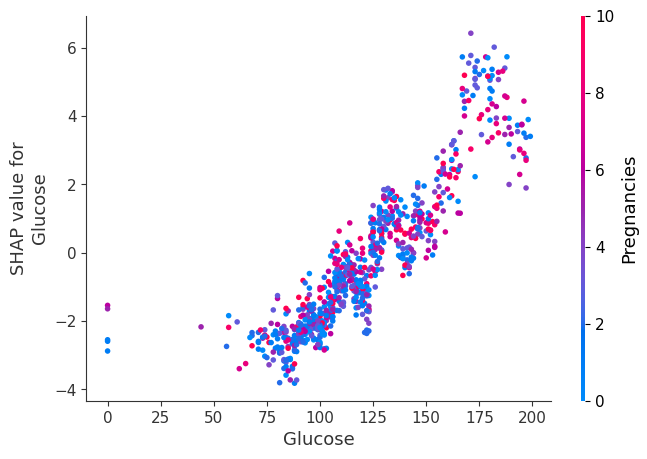

In [30]:
# Dependence Plot for 'Glucose'
shap.dependence_plot('Glucose', shap_values, X)


##3. Bar Plot
The bar plot shows the average absolute SHAP values for each feature, highlighting global feature importance.

python

Bar Plot
shap.summary_plot(shap_values, X, plot_type='bar')
Interpretation:
It provides a simpler alternative to the summary plot.
Focuses on the magnitude of the SHAP values (ignoring direction).


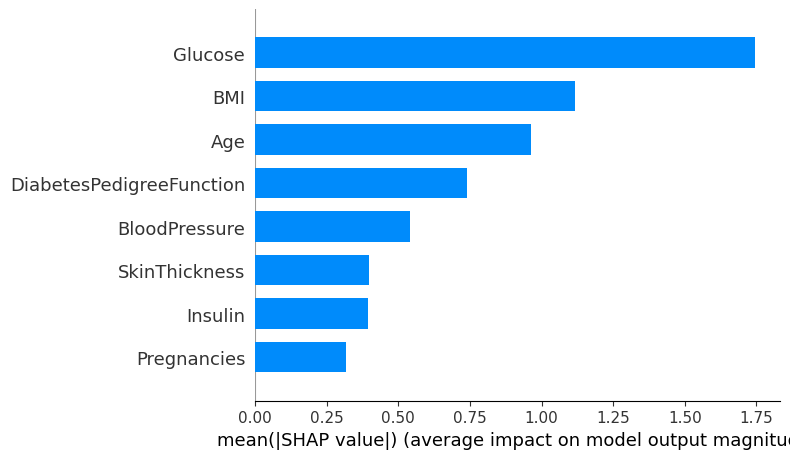

In [31]:
# Bar Plot
shap.summary_plot(shap_values, X, plot_type='bar')


##4. Force Plot
The force plot explains how each feature contributes to a single prediction. If interactive plots don't work in Colab, use SHAP’s HTML export feature.





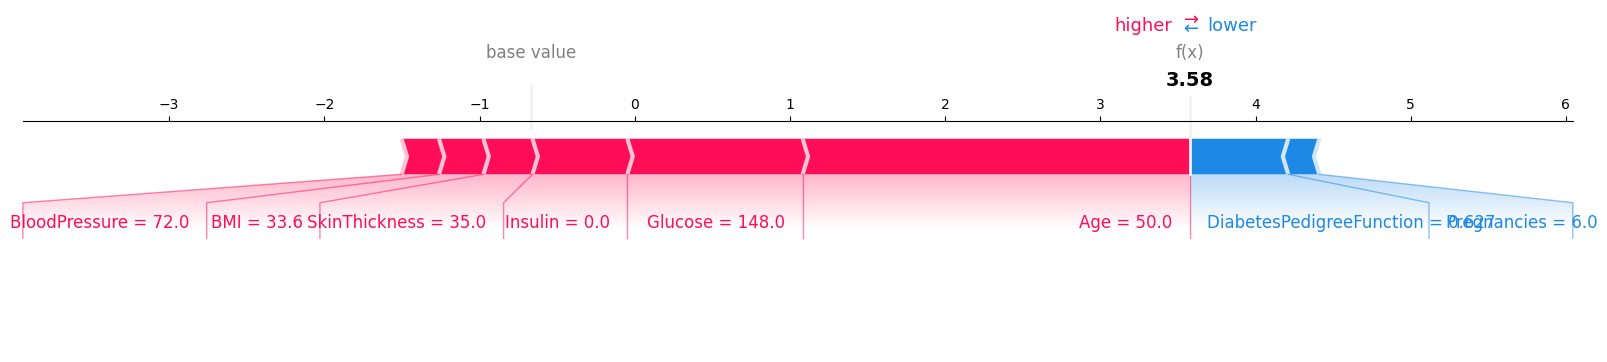

In [32]:
# Force Plot for a Single Prediction
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :],matplotlib=True)

# Force plots are used to visualize the impact of each feature on a specific prediction.
# - `explainer.expected_value`: The base value or average prediction of the model.
# - `shap_values[0, :]`: The SHAP values for the first sample in the dataset.
# - `X_test.iloc[0, :]`: The feature values of the first sample from the test dataset.







##5. Waterfall Plot
The waterfall plot shows a breakdown of how each feature contributes to a single prediction.


Interpretation:
It visualizes the additive nature of SHAP values.
The base value adjusts step-by-step based on feature contributions to reach the final prediction.


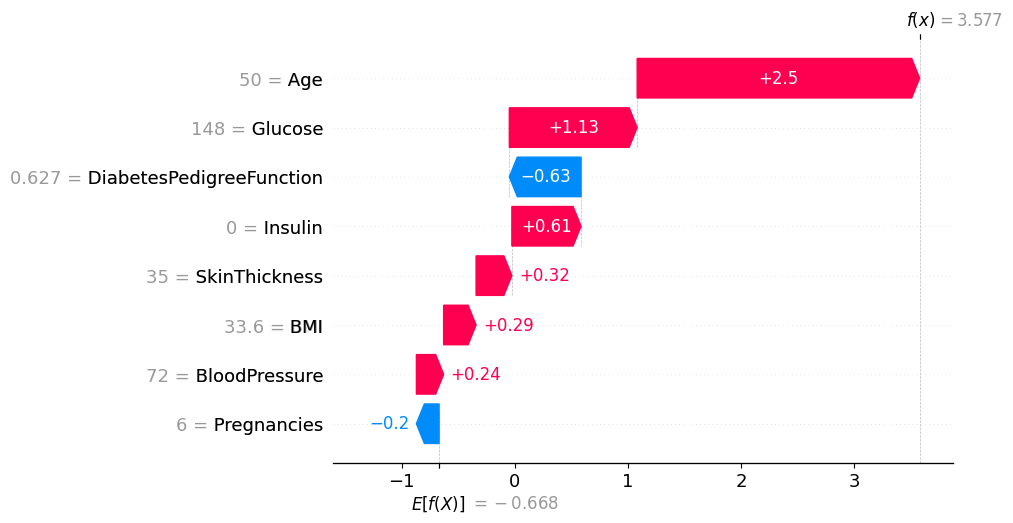

In [33]:
# Waterfall Plot
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X.iloc[0]))



##6. Decision Plot
The decision plot shows how a model makes predictions by combining SHAP values across features. This plot is useful for understanding complex tree-based models.

The x-axis represents the model output.
Each feature contributes to moving the prediction from the base value to the final value.


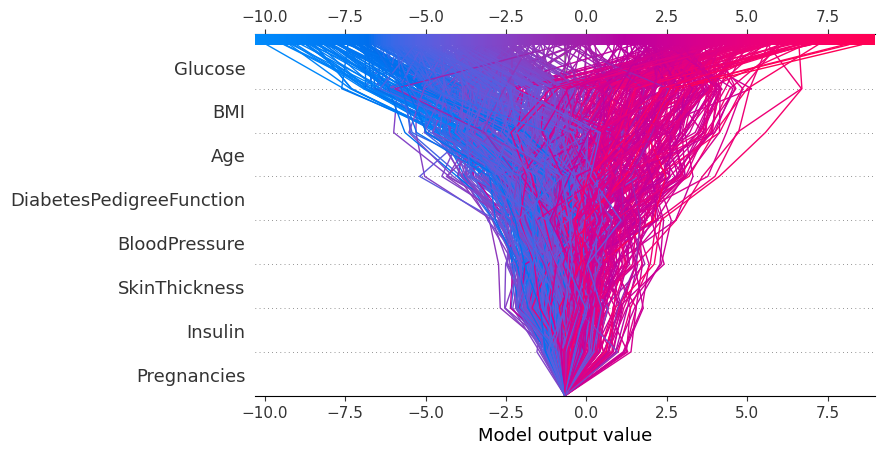

In [34]:
# Decision Plot
shap.decision_plot(explainer.expected_value, shap_values, X)


##7. Heatmap
The heatmap shows interactions between features and their combined impact on predictions.


Interpretation:
Helps identify strong feature interactions.
Color intensity represents the magnitude of the SHAP value..decision_plot(explainer.expected_value, shap_values, X)
Inter

What the SHAP Heatmap Represents:

- Rows (Samples):

Each row represents a sample (data point) from your dataset.
For example, if you have 100 test samples, the heatmap will have 100 rows.

- Columns (Features):

Each column represents a feature in the dataset.
For example, if you have 8 features (like Age, Glucose), the heatmap will have 8 columns.

- Colors (SHAP Values):

The color intensity indicates the magnitude of the SHAP value (the importance of the feature).
The color itself indicates whether the feature had a positive or negative impact on the prediction:
Red (positive): The feature increased the model's prediction for a specific class.
Blue (negative): The feature decreased the model's prediction for a specific class.

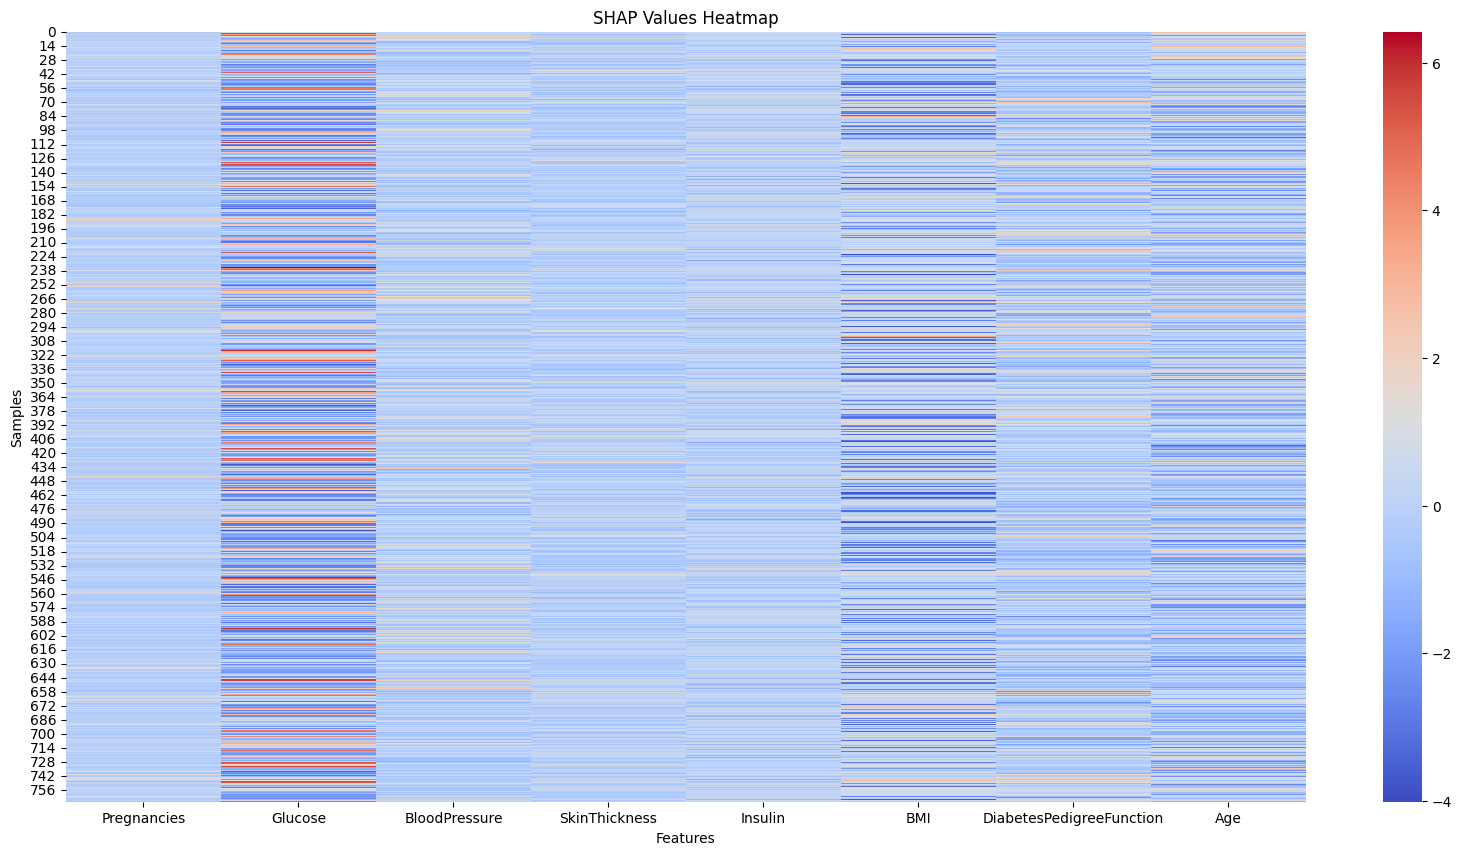

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert SHAP values to a DataFrame for better visualization
shap_df = pd.DataFrame(shap_values, columns=X.columns)

# Plot the heatmap using Seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(shap_df, cmap='coolwarm', cbar=True, xticklabels=X.columns)
plt.title("SHAP Values Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()


Note:
 - The force plot shows how features push the prediction above or below the base value.
- Positive SHAP values push the prediction higher, while negative SHAP values push it lower.
 - `matplotlib=True` might be needed if running this code in Colab or Jupyter to render the plot.

##Partial Dependence Plots
It’s one of the simplest methods to understand how different features interact with each other and with the target. In this method, we change the value of one feature, while keeping others constant and observe the change in the dependent target.

This method allows us to identify regions where the change in feature values has a crucial impact on the prediction.

The Python partial dependence plot toolbox or PDPbox is a package that provides functions to visualize these. In the same case of diabetes prediction, let us see how to plot partial dependence plots for a single feature:

In [36]:
 #pip install pdpbox

In [37]:
from pdpbox import pdp
import matplotlib.pyplot as plt

# Define feature names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure',
                 'SkinThickness', 'Insulin', 'BMI',
                 'DiabetesPedigreeFunction', 'Age']

# Plot PDP for 'Glucose'
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test,
                            model_features=feature_names,
                            feature='Glucose')
pdp.pdp_plot(pdp_goals, 'Glucose')
plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt

# Load dataset
github_url = "https://raw.githubusercontent.com/Piyumi22/XAI/main/diabetes.csv"
df = pd.read_csv(github_url)

# Define features and target
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_names]
y = df['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Generate Partial Dependence Plot for 'Glucose'
pdp_glucose = pdp_isolate(
    model=model,
    dataset=X_test,
    model_features=feature_names,
    feature='Glucose'
)

# Plot the Partial Dependence Plot
pdp_plot(pdp_glucose, feature_name='Glucose')
plt.show()



ImportError: cannot import name 'pdp_isolate' from 'pdpbox.pdp' (/usr/local/lib/python3.10/dist-packages/pdpbox/pdp.py)

In [ ]:
# Define feature names
# A list of feature names corresponding to the columns in the dataset.
# These names are used to reference features for Partial Dependence Plots (PDP).
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure',
                 'SkinThickness', 'Insulin', 'BMI',
                 'DiabetesPedigreeFunction', 'Age']

# Import necessary modules
# pdpbox is used for creating Partial Dependence Plots to understand how features affect the model predictions.
from pdpbox import pdp, get_dataset, info_plots

# Plot PDP for a single feature
# pdp_isolate computes the Partial Dependence function for a specific feature.
# - `model`: The trained XGBoost classifier.
# - `dataset`: The test dataset (X_test) to analyze the model's behavior.
# - `model_features`: The list of feature names to match with the dataset.
# - `feature`: The specific feature to analyze ('Glucose' in this case).
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test,
                            model_features=feature_names,
                            feature='Glucose')

from sklearn.inspection import plot_partial_dependence

# Plot PDP for the 'Glucose' feature
plot_partial_dependence(model, X_test, ['Glucose'])
plt.show()


# Plot the Partial Dependence Plot for the selected feature
# pdp_plot visualizes the relationship between the selected feature ('Glucose') and the model's predictions.
pdp.pdp_plot(pdp_goals, 'Glucose')

# Show the plot
# plt.show() displays the plot generated by pdp_plot.
import matplotlib.pyplot as plt  # Ensure you import matplotlib for this
plt.show()


In [ ]:
# Import required modules
from pdpbox import pdp  # Removed `get_dataset` import
import matplotlib.pyplot as plt

# Define feature names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure',
                 'SkinThickness', 'Insulin', 'BMI',
                 'DiabetesPedigreeFunction', 'Age']

# Plot PDP for a single feature
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test,
                            model_features=feature_names,
                            feature='Glucose')
pdp.pdp_plot(pdp_goals, 'Glucose')
plt.show()


In [ ]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# Plot PDP for the 'Glucose' feature
plot_partial_dependence(model, X_test, ['Glucose'])
plt.show()


In [ ]:
from sklearn.inspection import PartialDependenceDisplay
# Generate and visualize Partial Dependence Plot for the 'Glucose' feature
PartialDependenceDisplay.from_estimator(model, X, ['Glucose'])
plt.show()

##Permutation Feature Importance
It is a simple and intuitive method to find the feature importance and ranking for non-linear black box models. In this method, we randomly shuffle or change the value of a single feature, while the remaining features are constant.

Then, we check the model performance using relevant metrics such as accuracy, RMSE, etc., done iteratively for all the features. The larger the drop in performance after shuffling a feature, the more significant it is.
- If shuffling a feature has a very low impact, we can even **drop the variable to reduce noise**

 can compute the permutation feature importance in a few simple steps using the Tree Interpreter or ELI5 library.

In [ ]:
# Import the package and module

import eli5

from eli5.sklearn import PermutationImportance

# Pass the model and test dataset

my_set = PermutationImportance(model, random_state=34).fit(X_test,y_test)

eli5.show_weights(my_set, feature_names = X_test.columns.tolist())

##LIME
Local Interpretable Model-Agnostic Explanations (LIME) is widely used to explain black box models at a local level. When we have complex models like CNNs, LIME uses a simple, explainable model to understand its prediction.

To make it even easier to understand, let’s see how LIME works in a step-wise manner:

Define your local point: Choose a specific prediction you want to explain (e.g., why an image was classified as a cat by a CNN).

Generate variations: Create slight variations of the input data (e.g., slightly modified pixels in the image).

Predict with the original model: Pass the input to CNN and get the predicted output class for each variation.

Build an explainer model: Train a simple linear model to explain the relationship between the variations and the model’s predictions.

Interpret the explainer: Now, you can interpret the explainer model with any method like feature importance, PDP, etc. to understand which features played a crucial role in the original prediction.
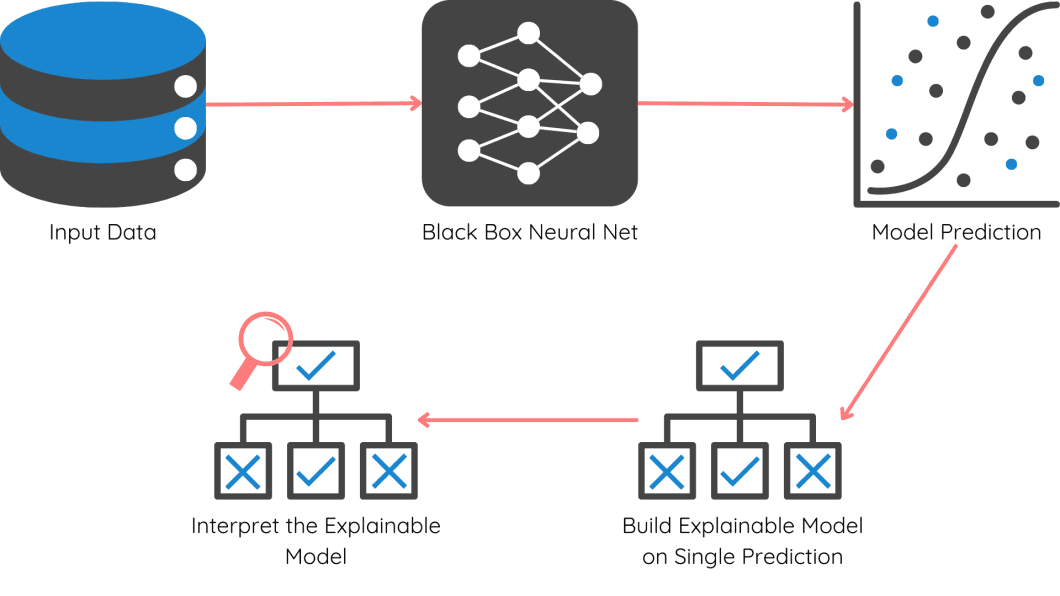